In [1]:
import pandas as ad
import datetime
import pandas_datareader.data as web
from pandas import Series,DataFrame

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as ad
import datetime
import pandas_datareader.data as web
from pandas import Series,DataFrame

In [5]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime.now()
df=web.DataReader("AAPL","yahoo",start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.014299
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.419203
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.464878
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.043921
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,25.995777


In [6]:
dfref=df.loc[:,['Adj Close','Volume']]
dfref['HL_PCT']=(df['High']-df['Low'])/df['Close']*100
dfref['PCT_change']=(df['Close']-df['Open'])/df['Open']*100
dfref.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2009-12-31,26.014299,88102700.0,1.323968,-1.126074
2010-01-04,26.419203,123432400.0,0.990606,0.271752
2010-01-05,26.464878,150476200.0,1.091520,-0.102519
2010-01-06,26.043921,138040000.0,2.123523,-1.590633
2010-01-07,25.995777,119282800.0,1.400893,-0.552538


In [7]:
import math
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split


In [21]:
dfref.fillna(value=99999,inplace=True)
forecast_out=int(math.ceil(0.01*len(dfref)))
forecast_col='Adj Close'
dfref['label']=dfref[forecast_col].shift(-forecast_out)
X=np.array(dfref.drop(['label'],1))
X=preprocessing.scale(X)
X_late=X[-forecast_out:]
X=X[:-forecast_out]
y=np.array(dfref['label'])
y=y[:-forecast_out]
X.shape
y.shape

(2648,)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [23]:
#分析線性回歸的置信度
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
clfreg=LinearRegression(n_jobs=-1)


In [24]:
clfreg.fit(X_train,y_train)
clfreg2=make_pipeline(PolynomialFeatures(2),Ridge())
clfreg2.fit(X_train,y_train)
clfreg3=make_pipeline(PolynomialFeatures(3),Ridge())
clfreg3.fit(X_train,y_train)
#KNN
clfknn=KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [25]:
cl1=clfreg.score(X_test,y_test)
cl1

0.9620957053851125

In [26]:
cl2=clfreg2.score(X_test,y_test)
cl2

0.9620960692035355

In [27]:
cl3=clfreg3.score(X_test,y_test)
cl3

0.959084024364071

In [28]:
cl4=clfknn.score(X_test,y_test)
cl4

0.9452862604105132

In [29]:
clfreg.fit(X_train,y_train)
acc=clfreg.score(X_test,y_test)
foreset=clfreg.predict(X_late)
dfref['Forecast']=np.nan

In [31]:
last_date=dfref.iloc[-1].name
last_unix=last_date
next_unix=last_unix+datetime.timedelta(days=1)
for i in foreset:
    next_date=next_unix
    next_unix+=datetime.timedelta(days=1)
    dfref.loc[next_date]=[np.nan for _ in range(len(dfref.columns)-1)]+[i]

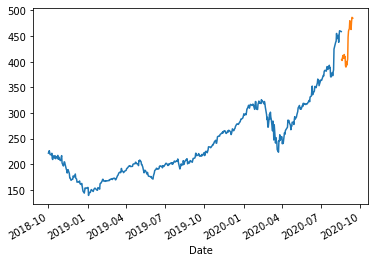

In [32]:
dfref['Adj Close'].tail(500).plot()
dfref['Forecast'].tail(500).plot()
